In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard
import pickle

In [20]:
def keras_model(image_x, image_y, num_of_classes):
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(image_x,image_y,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(num_of_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    filepath = "../models/QuickDraw.keras"
    checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]

    return model, callbacks_list

In [8]:
def loadFromPickle():
    with open("../features", "rb") as f:
        features = np.array(pickle.load(f))
    with open("../labels", "rb") as f:
        labels = np.array(pickle.load(f))

    return features, labels

def augmentData(features, labels):
    features = np.append(features, features[:, :, ::-1], axis=0)
    labels = np.append(labels, -labels, axis=0)
    return features, labels

def prepress_labels(labels):
    labels = tf.keras.utils.to_categorical(labels)
    return labels

Dataset shape: Features (210000, 784), Labels (210000, 1)
Feature data type: float32, range: [0.000, 1.000]

Class distribution:
Class 0: 10,000 samples (4.8%)
Class 1: 10,000 samples (4.8%)
Class 2: 10,000 samples (4.8%)
Class 3: 10,000 samples (4.8%)
Class 4: 10,000 samples (4.8%)
Class 5: 10,000 samples (4.8%)
Class 6: 10,000 samples (4.8%)
Class 7: 10,000 samples (4.8%)
Class 8: 10,000 samples (4.8%)
Class 9: 10,000 samples (4.8%)
Class 10: 10,000 samples (4.8%)
Class 11: 10,000 samples (4.8%)
Class 12: 10,000 samples (4.8%)
Class 13: 10,000 samples (4.8%)
Class 14: 10,000 samples (4.8%)
Class 15: 10,000 samples (4.8%)
Class 16: 10,000 samples (4.8%)
Class 17: 10,000 samples (4.8%)
Class 18: 10,000 samples (4.8%)
Class 19: 10,000 samples (4.8%)
Class 20: 10,000 samples (4.8%)

Total classes: 21
Total samples: 210,000
Min samples per class: 10,000
Max samples per class: 10,000
Class imbalance ratio: 1.00:1
Dataset balanced: True


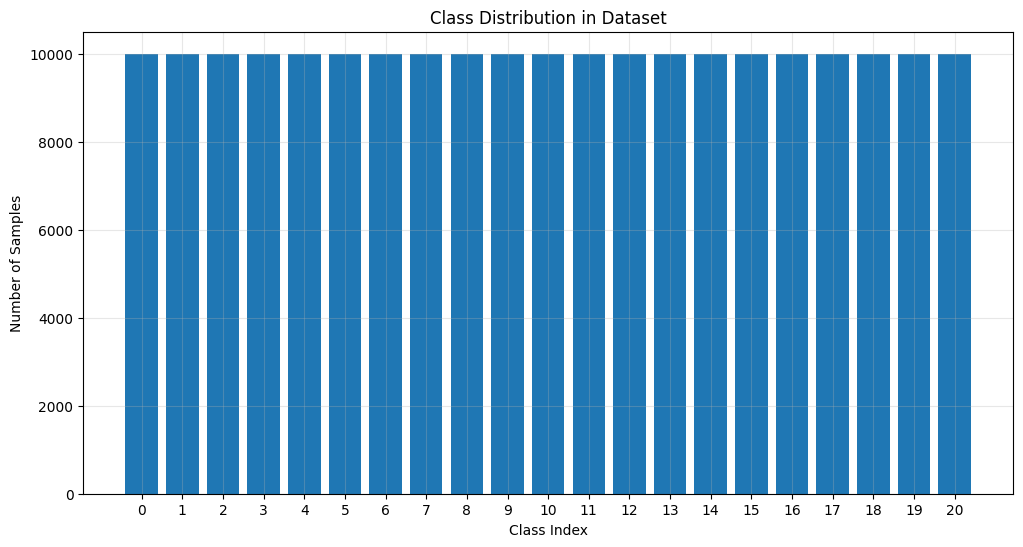


Data Quality Check:
Any NaN values in features: False
Any infinite values in features: False
Feature value range check: 0.0 to 1.0


In [9]:
# Load and analyze the dataset
features, labels = loadFromPickle()

print(f"Dataset shape: Features {features.shape}, Labels {labels.shape}")
print(f"Feature data type: {features.dtype}, range: [{features.min():.3f}, {features.max():.3f}]")

# Analyze class distribution
unique, counts = np.unique(labels, return_counts=True)
print(f"\nClass distribution:")
for i, (class_idx, count) in enumerate(zip(unique, counts)):
    print(f"Class {int(class_idx)}: {count:,} samples ({count/len(labels)*100:.1f}%)")

print(f"\nTotal classes: {len(unique)}")
print(f"Total samples: {len(labels):,}")
print(f"Min samples per class: {counts.min():,}")
print(f"Max samples per class: {counts.max():,}")
print(f"Class imbalance ratio: {counts.max()/counts.min():.2f}:1")

# Check if data is balanced
is_balanced = (counts.max() - counts.min()) <= (0.1 * np.mean(counts))
print(f"Dataset balanced: {is_balanced}")

# Visualize class distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(range(len(counts)), counts)
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Dataset')
plt.xticks(range(len(counts)))
plt.grid(True, alpha=0.3)
plt.show()

# Check data quality
print(f"\nData Quality Check:")
print(f"Any NaN values in features: {np.isnan(features).any()}")
print(f"Any infinite values in features: {np.isinf(features).any()}")
print(f"Feature value range check: {features.min()} to {features.max()}")

Class Index to Name Mapping:
Class 0: airplane
Class 1: apple
Class 2: banana
Class 3: bicycle
Class 4: bus
Class 5: car
Class 6: cat
Class 7: computer
Class 8: dog
Class 9: elephant
Class 10: fish
Class 11: flower
Class 12: horse
Class 13: house
Class 14: moon
Class 15: rabbit
Class 16: smiley face
Class 17: star
Class 18: sun
Class 19: tree
Class 20: truck

Visualizing samples from each class...


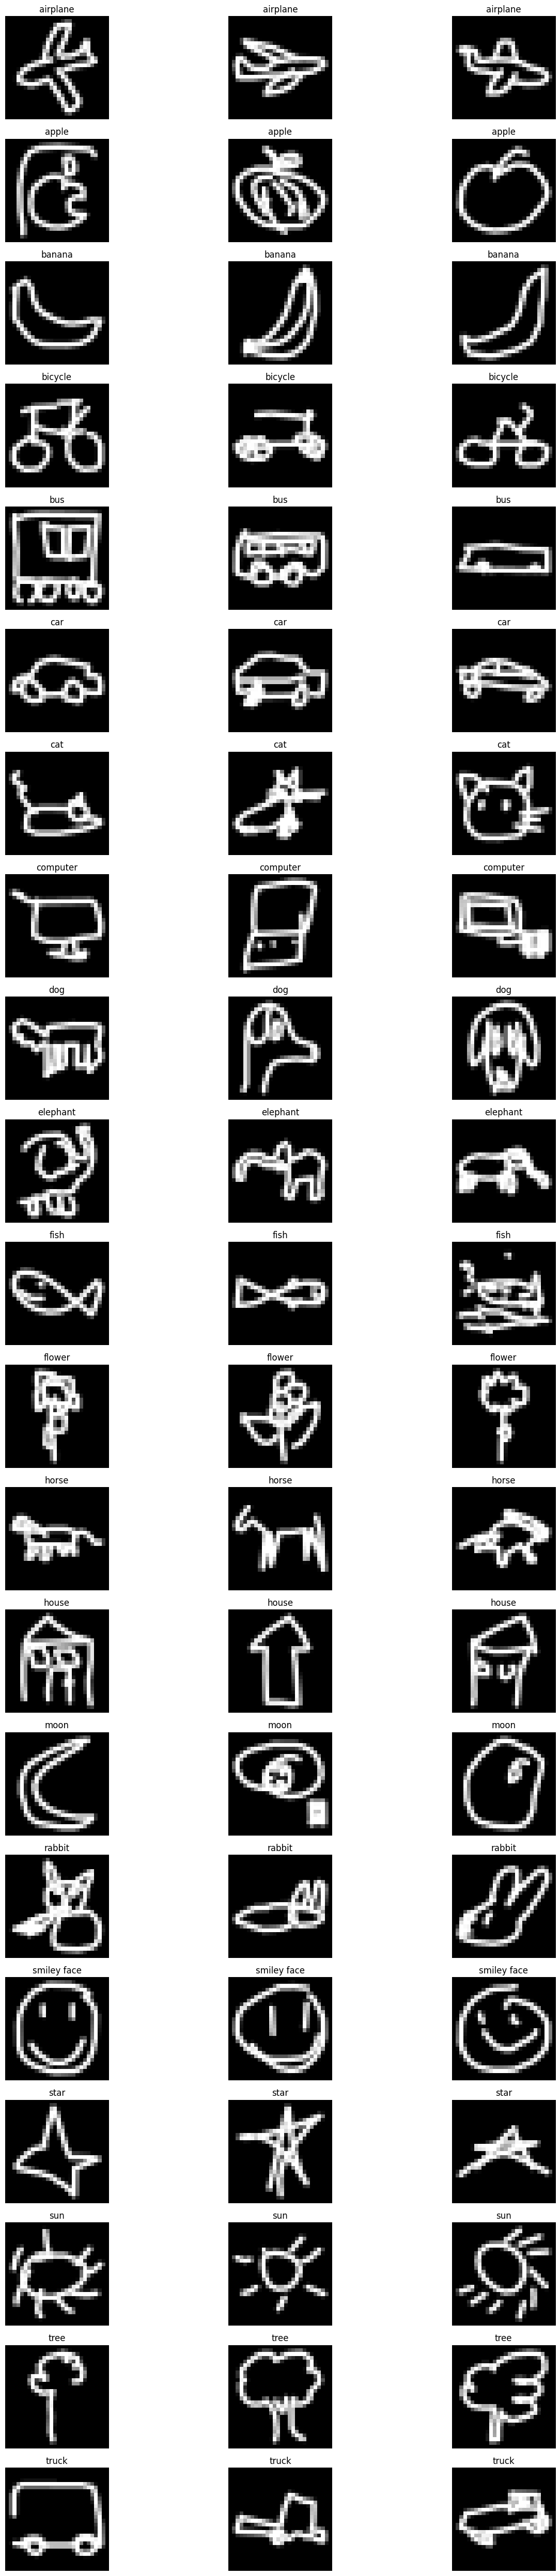

In [16]:
# Class mapping - based on our 21 classes 
CLASS_NAMES = [
    'airplane', 'apple', 'banana', 'bicycle', 'bus', 'car', 'cat', 'computer', 'dog', 'elephant', 'fish', 'flower', 'horse', 'house', 'moon', 'rabbit', 'smiley face', 'star', 'sun', 'tree', 'truck'
]

print("Class Index to Name Mapping:")
for i, name in enumerate(CLASS_NAMES):
    highlight = " <<<< CHAIR" if name == 'chair' else ""
    print(f"Class {i}: {name}{highlight}")


# Let's examine some samples from different classes to understand the data
def visualize_samples(features, labels, class_names, num_samples=5):
    """Visualize random samples from each class"""
    fig, axes = plt.subplots(len(class_names), num_samples, figsize=(15, 50))
    
    for class_idx in range(len(class_names)):
        # Get samples for this class
        class_mask = labels.flatten() == class_idx
        class_samples = features[class_mask]
        
        # Select random samples
        sample_indices = np.random.choice(len(class_samples), min(num_samples, len(class_samples)), replace=False)
        
        for i, sample_idx in enumerate(sample_indices):
            sample = class_samples[sample_idx].reshape(28, 28)
            axes[class_idx, i].imshow(sample, cmap='gray')
            axes[class_idx, i].set_title(f'{class_names[class_idx]}')
            axes[class_idx, i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize samples from each class
print("\nVisualizing samples from each class...")
visualize_samples(features, labels, CLASS_NAMES, num_samples=3)

In [19]:
# Determine number of classes from the data
num_of_classes = len(np.unique(labels))
print(f"Number of classes: {num_of_classes}")

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(features, labels, random_state=0,
                                                        test_size=0.1)

# Reshape features for CNN input (add channel dimension)
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)

# Convert labels to categorical format
train_y = tf.keras.utils.to_categorical(train_y, num_classes=num_of_classes)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=num_of_classes)

print(f"Training data shape: {train_x.shape}")
print(f"Training labels shape: {train_y.shape}")
print(f"Test data shape: {test_x.shape}")
print(f"Test labels shape: {test_y.shape}")

# Create the model
model, callbacks_list = keras_model(28, 28, num_of_classes)
model.summary()

Number of classes: 21
Training data shape: (189000, 28, 28, 1)
Training labels shape: (189000, 21)
Test data shape: (21000, 28, 28, 1)
Test labels shape: (21000, 21)
Training data shape: (189000, 28, 28, 1)
Training labels shape: (189000, 21)
Test data shape: (21000, 28, 28, 1)
Test labels shape: (21000, 21)


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 21)             │         2,709 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 645,269 (2.46 MB)

 Trainable params: 645,269 (2.46 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Train the model
history = model.fit(train_x, train_y, 
                   validation_data=(test_x, test_y), 
                   epochs=3, 
                   batch_size=64,
                   callbacks=callbacks_list,
                   verbose=1)

# Print training results
print(f"\nTraining completed!")
print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")

Epoch 1/3
2954/2954 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - accuracy: 0.5719 - loss: 1.4199 - val_accuracy: 0.8392 - val_loss: 0.5124
Epoch 2/3
2954/2954 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - accuracy: 0.5719 - loss: 1.4199 - val_accuracy: 0.8392 - val_loss: 0.5124
Epoch 2/3
   9/2954 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8296 - loss: 0.6056

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


2954/2954 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.8125 - loss: 0.6278 - val_accuracy: 0.8527 - val_loss: 0.4648
Epoch 3/3
2954/2954 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.8125 - loss: 0.6278 - val_accuracy: 0.8527 - val_loss: 0.4648
Epoch 3/3
2954/2954 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - accuracy: 0.8394 - loss: 0.5366 - val_accuracy: 0.8643 - val_loss: 0.4297
2954/2954 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - accuracy: 0.8394 - loss: 0.5366 - val_accuracy: 0.8643 - val_loss: 0.4297

Training completed!
Final training accuracy: 0.8400
Final validation accuracy: 0.8643

Training completed!
Final training accuracy: 0.8400
Final validation accuracy: 0.8643


In [22]:
# Save the final model
model.save('../models/QuickDraw_improved.keras')
print("Model saved successfully as 'QuickDraw_improved.keras'")

# Also save in H5 format for compatibility
model.save('../models/QuickDraw_improved.h5')
print("Model also saved in H5 format as 'QuickDraw_improved.h5'")

Model saved successfully as 'QuickDraw_improved.keras'
Model also saved in H5 format as 'QuickDraw_improved.h5'


In [23]:
# Final Class List Documentation
print("✅ MODEL TRAINING COMPLETED SUCCESSFULLY!")
print("=" * 60)
print("FINAL CLASS LIST (21 classes):")
print("=" * 60)

for i, class_name in enumerate(CLASS_NAMES):
    # Get emoji for each class (matching backend)
    emoji_map = {
        'airplane': '✈️', 'apple': '🍎', 'banana': '🍌', 'bicycle': '🚲', 'bus': '🚌',
        'car': '🚗', 'cat': '🐱', 'computer': '💻', 'dog': '🐶', 'elephant': '🐘',
        'fish': '🐟', 'flower': '🌸', 'horse': '🐴', 'house': '🏠', 'moon': '🌙',
        'rabbit': '🐰', 'smiley face': '😊', 'star': '⭐', 'sun': '☀️', 'tree': '🌳', 'truck': '🚚'
    }
    emoji = emoji_map.get(class_name, '❓')
    print(f"Class {i:2d}: {emoji} {class_name}")

print("\n" + "=" * 60)
print("MODEL INFORMATION:")
print("=" * 60)
print(f"Total classes: {num_of_classes}")
print(f"Model architecture: CNN with 2 Conv2D layers")
print(f"Input shape: (28, 28, 1)")
print(f"Training samples: {len(train_x):,}")
print(f"Test samples: {len(test_x):,}")
if 'history' in globals():
    print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
    print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")

print("\n" + "=" * 60)
print("SAVED MODELS:")
print("=" * 60)
print("📁 ../models/QuickDraw_improved.keras")
print("📁 ../models/QuickDraw_improved.h5")

print("\n✨ Backend and Frontend have been updated to use these 21 classes!")
print("🚀 The QuickDraw game is ready to run with the improved model!")

✅ MODEL TRAINING COMPLETED SUCCESSFULLY!
FINAL CLASS LIST (21 classes):
Class  0: ✈️ airplane
Class  1: 🍎 apple
Class  2: 🍌 banana
Class  3: 🚲 bicycle
Class  4: 🚌 bus
Class  5: 🚗 car
Class  6: 🐱 cat
Class  7: 💻 computer
Class  8: 🐶 dog
Class  9: 🐘 elephant
Class 10: 🐟 fish
Class 11: 🌸 flower
Class 12: 🐴 horse
Class 13: 🏠 house
Class 14: 🌙 moon
Class 15: 🐰 rabbit
Class 16: 😊 smiley face
Class 17: ⭐ star
Class 18: ☀️ sun
Class 19: 🌳 tree
Class 20: 🚚 truck

MODEL INFORMATION:
Total classes: 21
Model architecture: CNN with 2 Conv2D layers
Input shape: (28, 28, 1)
Training samples: 189,000
Test samples: 21,000
Final training accuracy: 0.8400
Final validation accuracy: 0.8643

SAVED MODELS:
📁 ../models/QuickDraw_improved.keras
📁 ../models/QuickDraw_improved.h5

✨ Backend and Frontend have been updated to use these 21 classes!
🚀 The QuickDraw game is ready to run with the improved model!
